In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (12, 10)

In [2]:
# load datasets
ctr_churn= pd.read_csv('cleaned_churned_dataset.csv')
ctr_churn.sample(5)

,Unnamed: 0,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
3056,3413,3414,15761.307000,24736.826630,7.0,0,27,5477.195827,AE_IN,0,0,0,0,2.697768,0
2335,2622,2623,44363.617370,100288.133800,19.0,0,23,32751.032180,AE_IN,0,0,0,1,1.011960,0
5148,5759,5760,18233.324350,48857.455140,9.0,0,35,8169.751536,AE_PK,0,0,0,0,0.201634,0
3280,3668,3669,18063.972550,5726.408233,5.0,0,24,4361.382191,AE_IN,0,0,0,0,2.002726,0
6081,6810,6811,9473.585634,29944.151300,6.0,0,26,1922.387707,AE_PK,0,0,0,0,2.610365,0


In [3]:
# check column
ctr_churn.columns

Index(['Unnamed: 0', 'cust_id', 'income', 'debt_with_other_lenders',
       'credit_score', 'has_previous_defaults_other_lenders',
       'num_remittances_prev_12_mth', 'remittance_amt_prev_12_mth',
       'main_remittance_corridor', 'opened_campaign_1', 'opened_campaign_2',
       'opened_campaign_3', 'opened_campaign_4', 'tenure_years', 'churned'],
      dtype='object')

In [4]:
# drop columns not needed
ctr_churn= ctr_churn.drop(['Unnamed: 0', 'cust_id'], axis=1)

In [5]:
# check missing values
ctr_churn.isnull().sum()

income                                 0
debt_with_other_lenders                0
credit_score                           0
has_previous_defaults_other_lenders    0
num_remittances_prev_12_mth            0
remittance_amt_prev_12_mth             0
main_remittance_corridor               0
opened_campaign_1                      0
opened_campaign_2                      0
opened_campaign_3                      0
opened_campaign_4                      0
tenure_years                           0
churned                                0
dtype: int64

In [6]:
# value counts on the remittance corridor
ctr_churn['main_remittance_corridor'].value_counts()

AE_IN    3392
AE_PK    2291
AE_PH     955
Name: main_remittance_corridor, dtype: int64

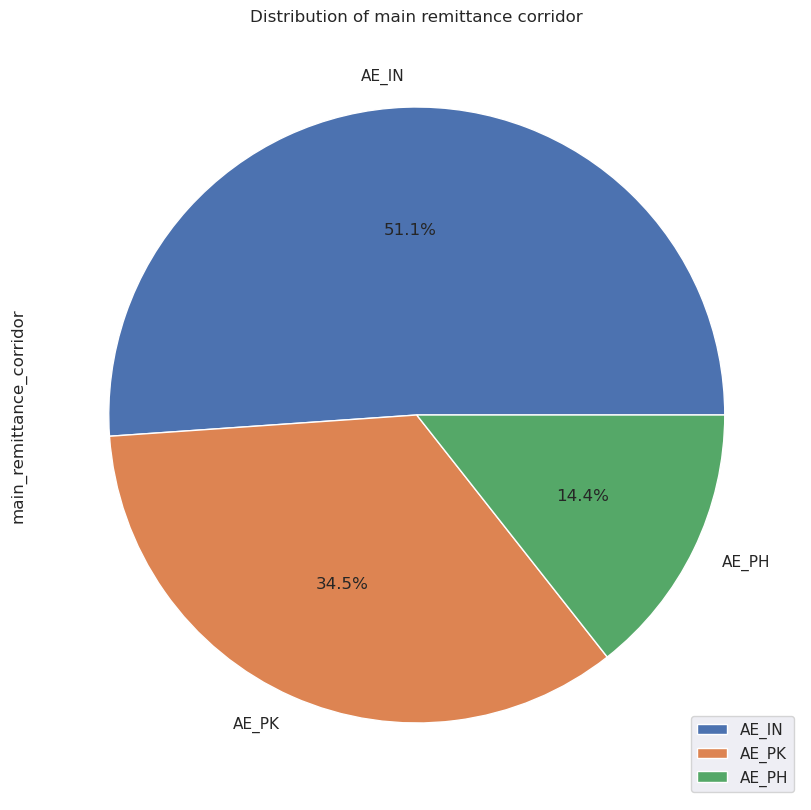

In [26]:
# Visualize this with a pie chart
pie = ctr_churn['main_remittance_corridor'].value_counts().plot(kind="pie",title='Distribution of main remittance corridor',legend=True, autopct='%1.1f%%')
plt.show()

In [8]:
# value count of credit score
ctr_churn['credit_score'].value_counts()

4.0     761
5.0     739
3.0     693
6.0     621
7.0     554
8.0     465
20.0    428
9.0     388
2.0     369
10.0    324
11.0    262
12.0    205
13.0    193
14.0    152
15.0    118
16.0     94
18.0     81
17.0     69
1.0      65
19.0     57
Name: credit_score, dtype: int64

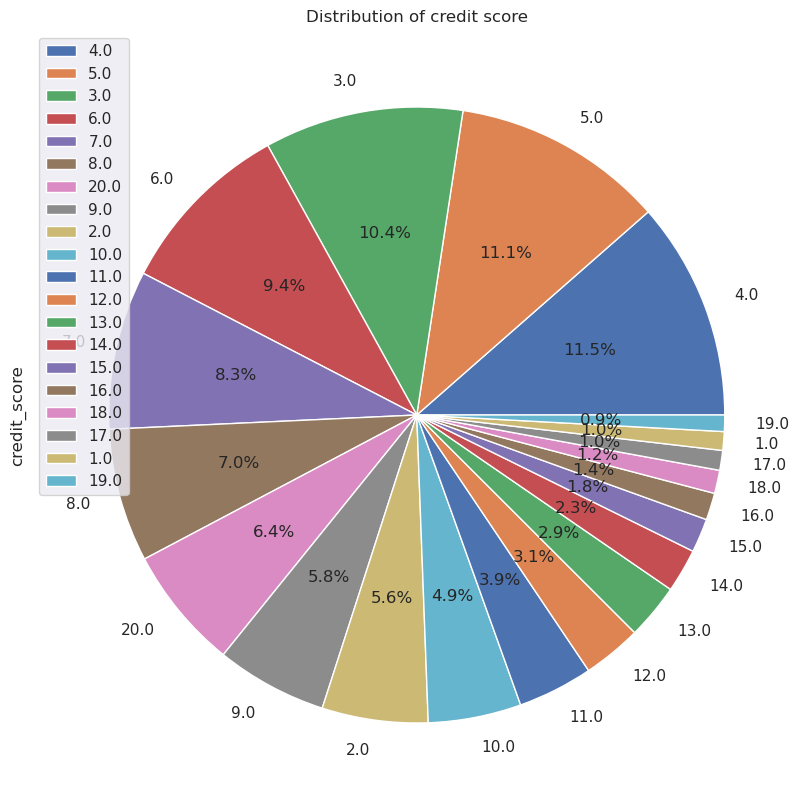

In [9]:
# Visualize this with a pie chart
pie = ctr_churn['credit_score'].value_counts().plot(kind="pie",title='Distribution of credit score',legend=True, autopct='%1.1f%%')
plt.show()

In [10]:
# value counts on the previous defaulters to other lenders
ctr_churn['has_previous_defaults_other_lenders'].value_counts()

0    5303
1    1335
Name: has_previous_defaults_other_lenders, dtype: int64

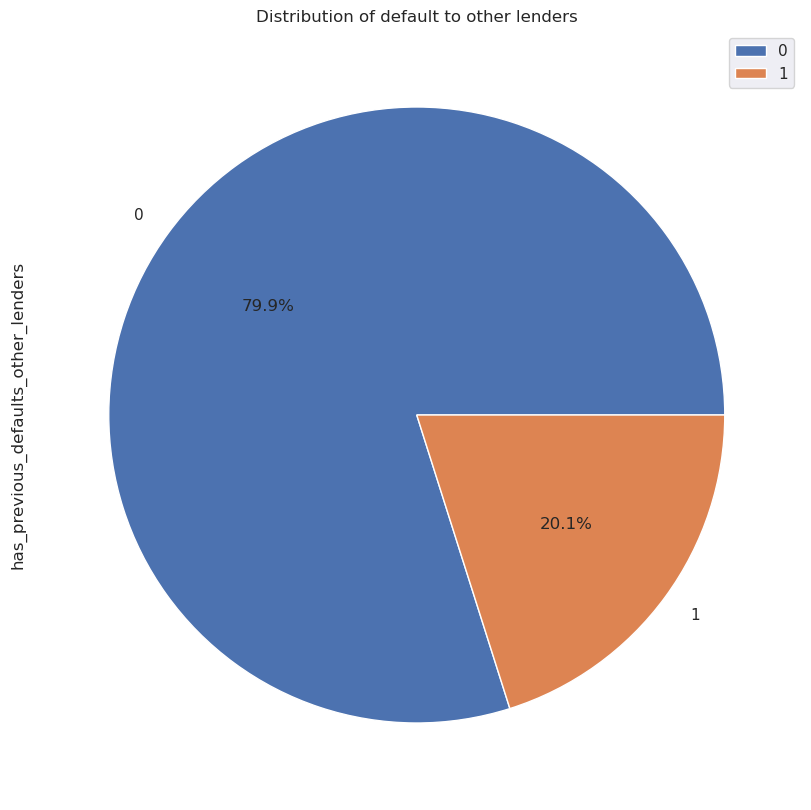

In [11]:
#Visualize this with a pie chart
pie = ctr_churn['has_previous_defaults_other_lenders'].value_counts().plot(kind="pie",title='Distribution of default to other lenders',legend=True, autopct='%1.1f%%')
plt.show()

In [12]:
# value count on churn status
ctr_churn['churned'].value_counts()

0    6157
1     481
Name: churned, dtype: int64

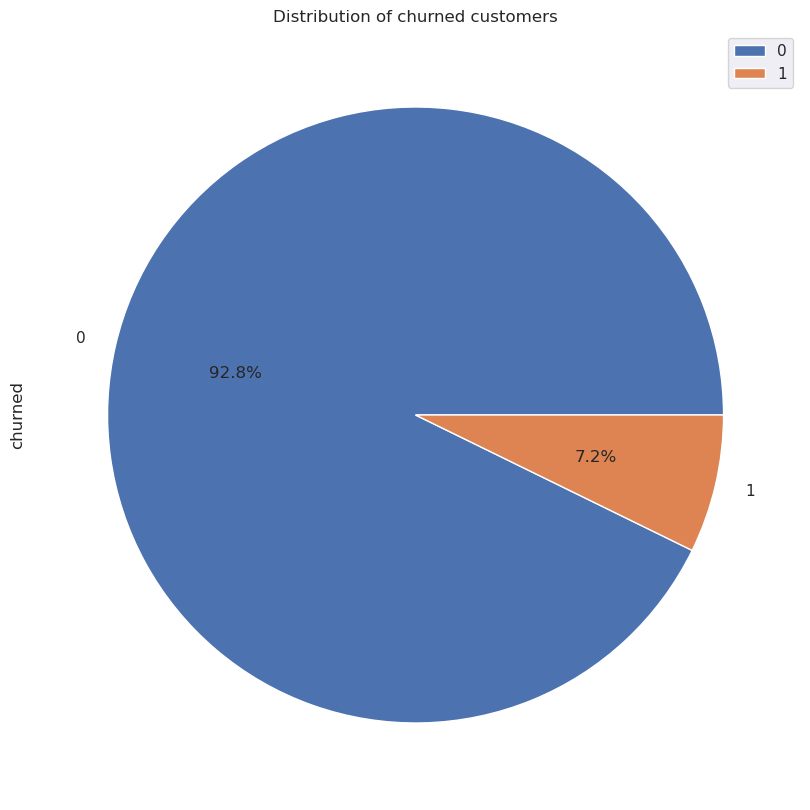

In [27]:
# Visualize this with a pie chart
pie = ctr_churn['churned'].value_counts().plot(kind="pie",title='Distribution of churned customers',legend=True, autopct='%1.1f%%')
plt.show()

In [14]:
# cross table on churn status and customers previous defaults to lenders
pd.crosstab(ctr_churn['has_previous_defaults_other_lenders'], ctr_churn['churned'])

churned,0,1
has_previous_defaults_other_lenders,,
0,4950,353
1,1207,128


In [15]:
# Create the cross table from earlier and include tenure years
pd.crosstab(ctr_churn["churned"], ctr_churn["has_previous_defaults_other_lenders"], values=ctr_churn['tenure_years'], aggfunc=['min','max'])

min                 max          
has_previous_defaults_other_lenders         0         1         0         1
churned                                                                    
0                                    0.000322  0.003510  2.999704  2.998807
1                                    0.000643  0.004128  1.279770  1.118138

In [16]:
# Create the cross table from earlier and income
pd.crosstab(ctr_churn["churned"], ctr_churn["has_previous_defaults_other_lenders"], values=ctr_churn['income'], aggfunc=['min','max'])

min                        max  \
has_previous_defaults_other_lenders            0            1             0   
churned                                                                       
0                                    2033.114127  1763.726965  244970.92610   
1                                    1434.354208  2130.345902   98758.99741   

                                                  
has_previous_defaults_other_lenders            1  
churned                                           
0                                    65498.32692  
1                                    21863.05765

/home/josephitopa/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/josephitopa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


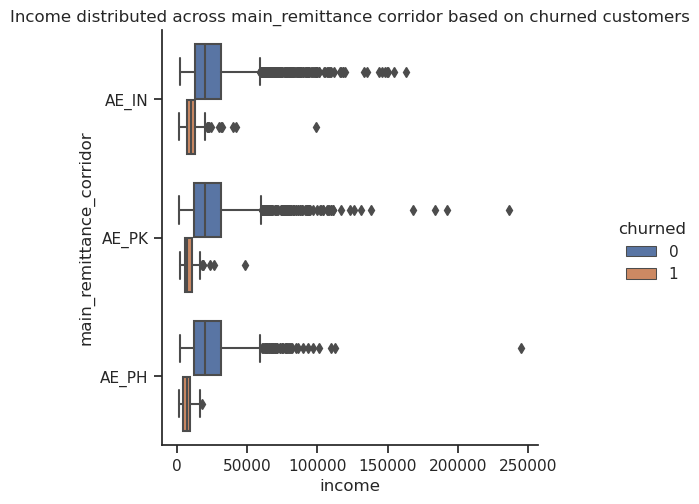

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("income", "main_remittance_corridor", "churned", data=ctr_churn, kind="box")
    g.set_axis_labels("income", "main_remittance_corridor");
    
plt.title("Income distributed across main_remittance corridor based on churned customers")
plt.show()

/home/josephitopa/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/josephitopa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


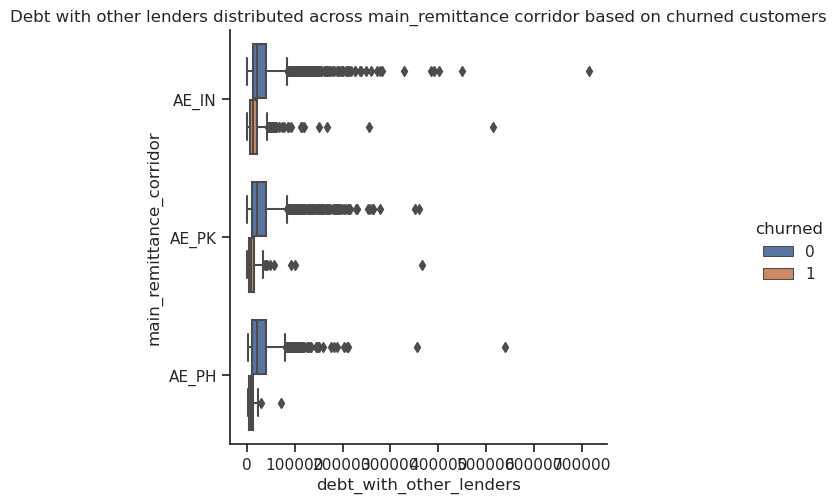

In [18]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("debt_with_other_lenders", "main_remittance_corridor", "churned", data=ctr_churn, kind="box")
    g.set_axis_labels("debt_with_other_lenders", "main_remittance_corridor");
    
plt.title("Debt with other lenders distributed across main_remittance corridor based on churned customers")
plt.show()

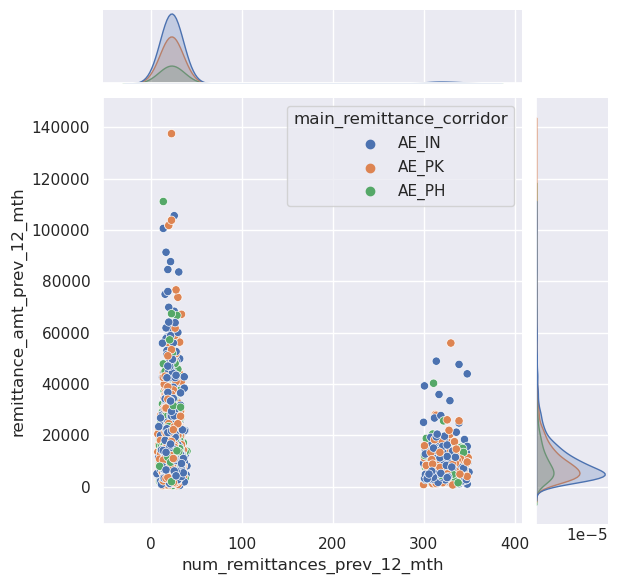

Text(0.5, 1.0, 'A joint plot of amount remitted vs number of times of remitting funds with respect to corridor')

In [31]:
# pd.crosstab(ctr_churn['num_remittances_prev_12_mth'], ctr_churn['churned'])
sns.jointplot(x='num_remittances_prev_12_mth', y='remittance_amt_prev_12_mth', data=ctr_churn, hue='main_remittance_corridor')
plt.show()
plt.title("A joint plot of amount remitted vs number of times of remitting funds with respect to corridor")

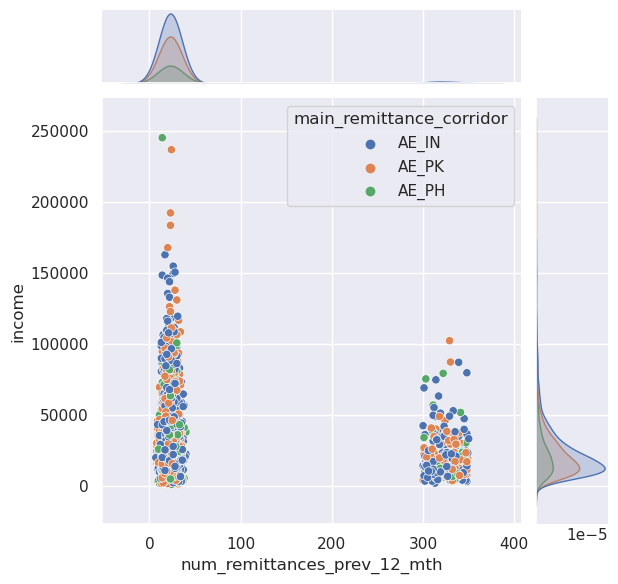

In [20]:
# pd.crosstab(ctr_churn['num_remittances_prev_12_mth'], ctr_churn['churned'])
sns.jointplot(x='num_remittances_prev_12_mth', y='income', data=ctr_churn, hue='main_remittance_corridor')
plt.show()

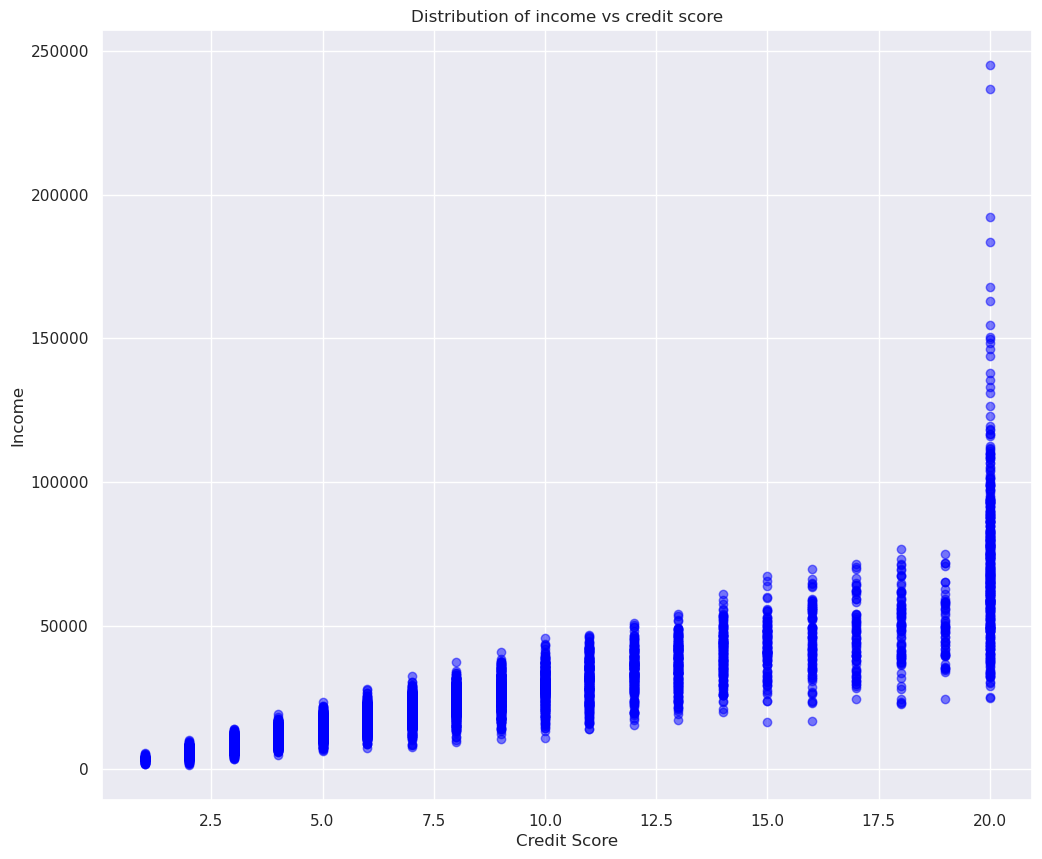

In [32]:
# Plot a scatter plot of credit score vs income
plt.scatter(ctr_churn['credit_score'], ctr_churn['income'],c='blue', alpha=0.5)
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.title('Distribution of income vs credit score')
plt.show()

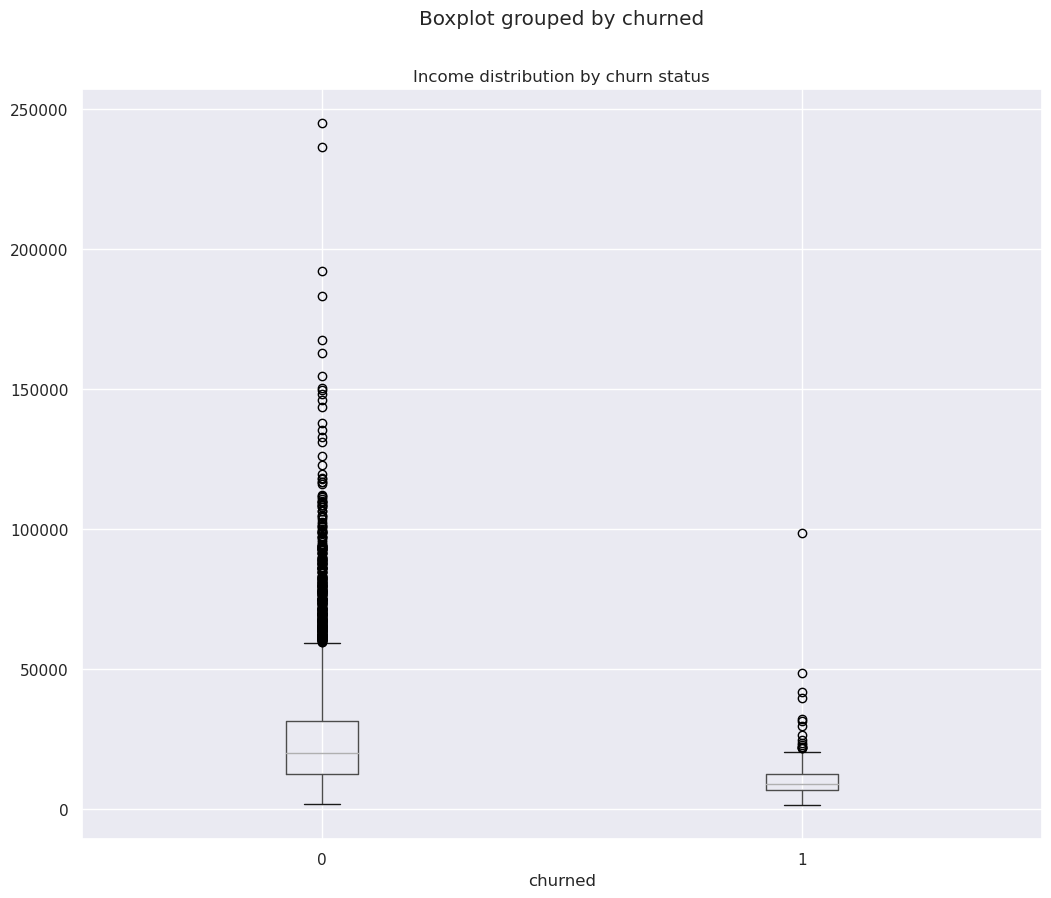

In [22]:
# Create a box plot of income by churn status
ctr_churn.boxplot(column= ["income"], by= "churned")
plt.title('Income distribution by churn status')
plt.show()

/home/josephitopa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


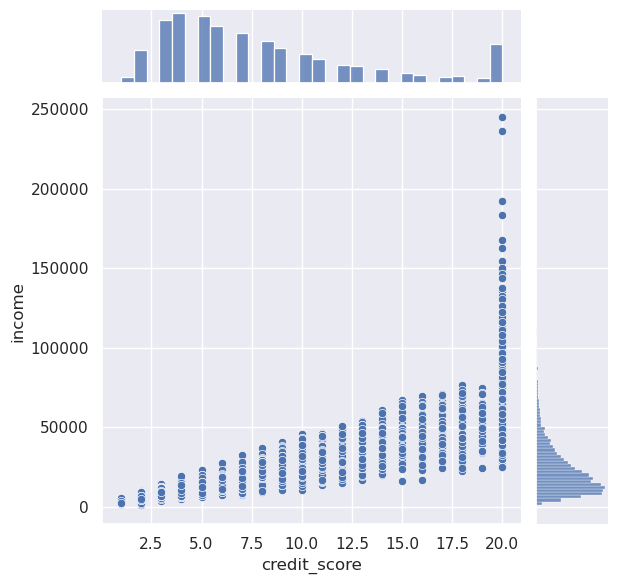

In [33]:
# joint plot of credit score against income
sns.jointplot("credit_score", "income", data=ctr_churn)
# plt.title('A joint plot of credit score against income')
plt.show()

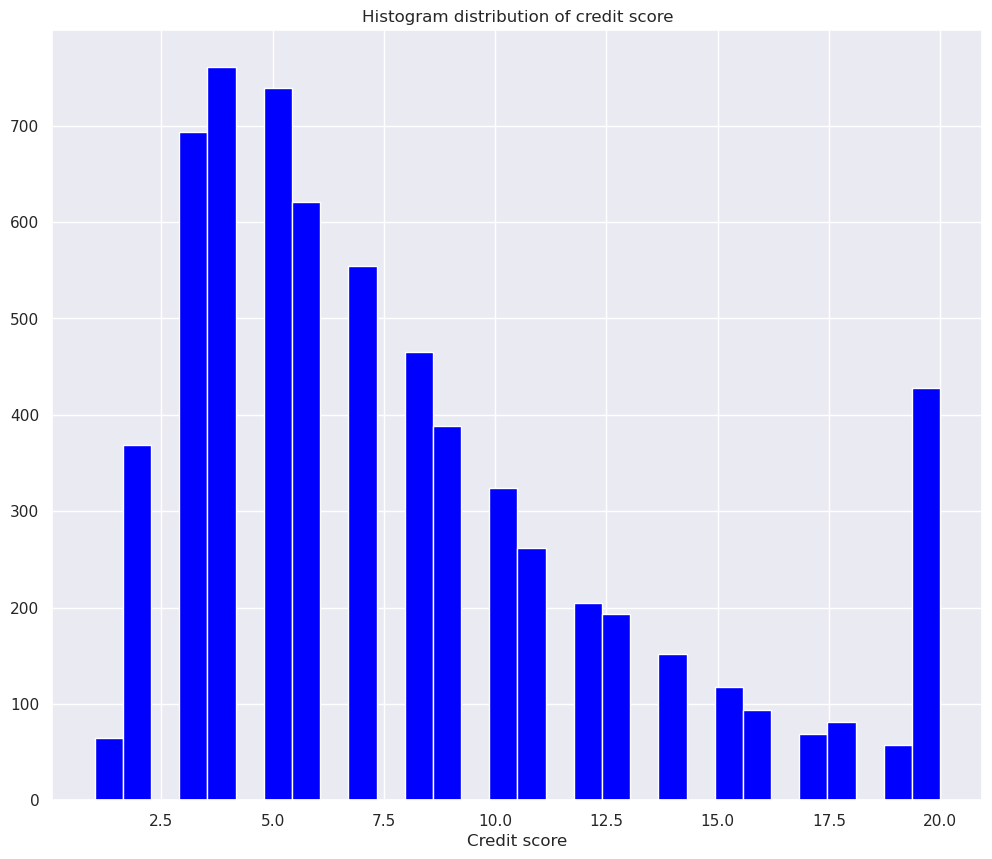

In [34]:
# Create a histogram of employment length
n, bins, patches = plt.hist(ctr_churn['credit_score'],bins='auto', color='blue')
plt.title('Histogram distribution of credit score')
plt.xlabel("Credit score")
plt.show()

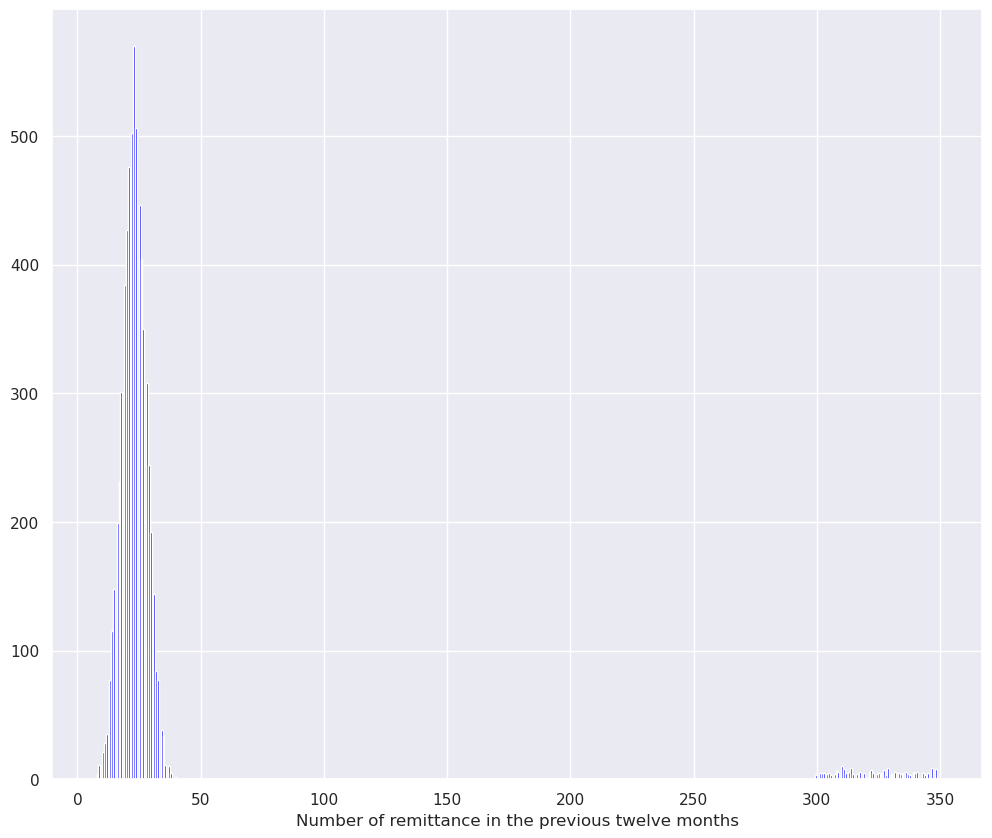

In [25]:
# Create a histogram of employment length
n, bins, patches = plt.hist(ctr_churn['num_remittances_prev_12_mth'],bins='auto', color='blue')
plt.xlabel("Number of remittance in the previous twelve months")
plt.show()